In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import numpy as np

# Loading_Data_Set

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')

In [3]:
df.head()

,S.NO,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
df.shape

(62630, 16)

In [5]:
df.isnull().sum()

S.NO             0
UTC              0
Temperature_C    0
Humidity         0
TVOC_ppb         0
eCO2_ppm         0
Raw H2           0
Raw Ethanol      0
Pressure_hPa     0
PM1.0            0
PM2.5            0
NC0.5            0
NC1.0            0
NC2.5            0
CNT              0
Fire_Alarm       0
dtype: int64

In [6]:
df.describe()

,S.NO,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


# Removing_Outliners

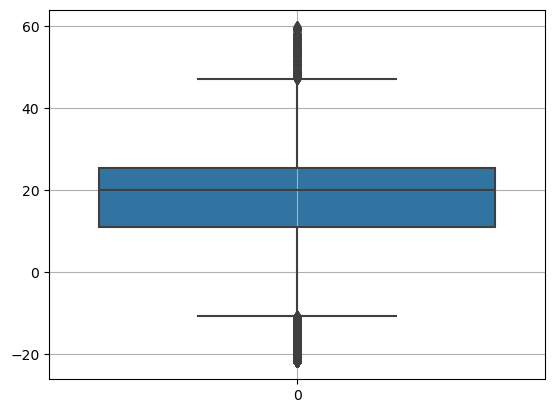

In [7]:
sns.boxplot(df.Temperature_C)
plt.grid()

In [8]:
df2 = df[~(df['Temperature_C'] > 50)]

In [9]:
df2.shape

(61796, 16)

<Axes: >

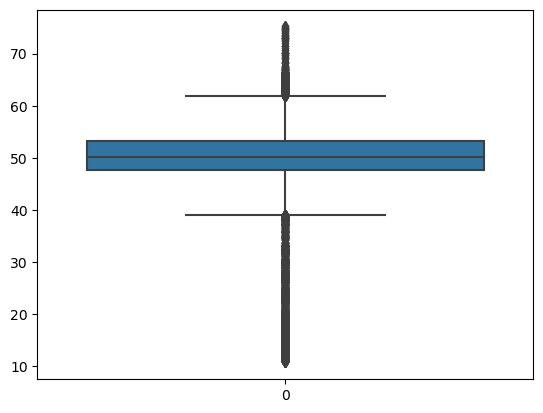

In [10]:
sns.boxplot(df2.Humidity)

In [11]:
df2 = df2[~(df2['Humidity'] > 60)]
df2.shape

(60728, 16)

In [12]:
df2.describe()

,S.NO,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
count,60728.000000,6.072800e+04,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000,60728.000000
mean,31011.659152,1.654793e+09,15.491311,48.717421,1527.713641,608.073409,12947.838625,19772.509600,938.655496,59.547309,98.022125,319.000772,107.149669,36.538450,10660.263453,0.723011
std,17935.857304,1.102584e+05,13.758065,7.894873,6356.419999,1608.750722,243.729419,563.067377,1.310223,667.981405,1289.347219,3375.291625,1434.181508,651.100698,7656.132385,0.447515
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15580.750000,1.654744e+09,10.842750,47.570000,125.000000,400.000000,12832.000000,19435.000000,938.703000,1.300000,1.360000,8.980000,1.407000,0.033000,3589.000000,0.000000
50%,30901.500000,1.654762e+09,20.060000,50.120000,981.000000,400.000000,12924.000000,19496.000000,938.818000,1.800000,1.880000,12.420000,1.938000,0.044000,9811.500000,1.000000
75%,46343.250000,1.654778e+09,25.230000,53.180000,1184.000000,434.000000,13106.000000,20080.000000,939.431000,2.080000,2.160000,14.320000,2.233000,0.051000,17402.250000,1.000000
max,62629.000000,1.655130e+09,49.990000,59.990000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,13346.690000,41262.980000,61482.030000,47089.598000,26916.836000,24993.000000,1.000000


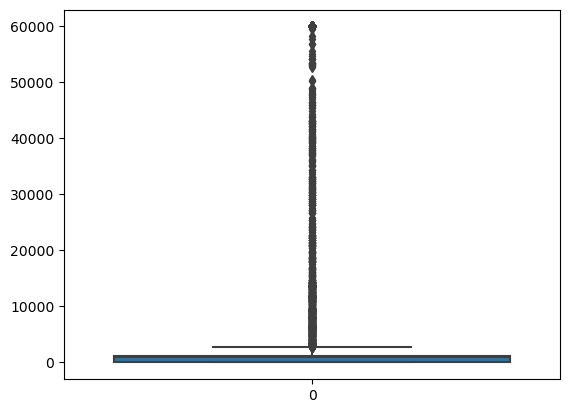

In [13]:
sns.boxplot(df2.TVOC_ppb)
plt.show()

In [14]:
df2 = df2[~(df2['TVOC_ppb']>8000)]
df2.shape

(59429, 16)

In [15]:
df2.describe()

,S.NO,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
count,59429.000000,5.942900e+04,59429.000000,59429.000000,59429.000000,59429.000000,59429.000000,59429.000000,59429.000000,59429.000000,59429.000000,59429.000000,59429.000000,59429.00000,59429.000000,59429.000000
mean,30378.052096,1.654788e+09,15.577486,49.262374,723.414629,511.167208,12964.369331,19811.508119,938.696899,14.316741,24.837424,73.504677,27.280890,10.01791,10789.989029,0.738512
std,17600.401131,1.028493e+05,13.373838,6.973859,678.626540,1068.365095,191.360615,467.716279,1.290010,317.369073,656.631308,1444.325552,732.902002,338.78818,7687.768589,0.439449
min,0.000000,1.654712e+09,-22.010000,11.140000,0.000000,400.000000,10939.000000,18339.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,15256.000000,1.654744e+09,11.312000,47.660000,120.000000,400.000000,12836.000000,19438.000000,938.707000,1.340000,1.390000,9.200000,1.443000,0.03400,3512.000000,0.000000
50%,30252.000000,1.654762e+09,20.100000,50.260000,938.000000,400.000000,12928.000000,19506.000000,938.828000,1.800000,1.870000,12.410000,1.936000,0.04400,10136.000000,1.000000
75%,45369.000000,1.654777e+09,25.220000,53.220000,1174.000000,431.000000,13108.000000,20087.000000,939.470000,2.070000,2.150000,14.270000,2.225000,0.05000,17565.000000,1.000000
max,62629.000000,1.655130e+09,49.950000,59.990000,7999.000000,60000.000000,13803.000000,21410.000000,939.861000,12758.650000,33098.860000,60442.710000,37451.695000,19725.38300,24993.000000,1.000000


In [16]:
df2 = df2[~(df2['eCO2_ppm']>1600)]
df2.shape

(58834, 16)

In [17]:
df.describe()

,S.NO,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


<Axes: >

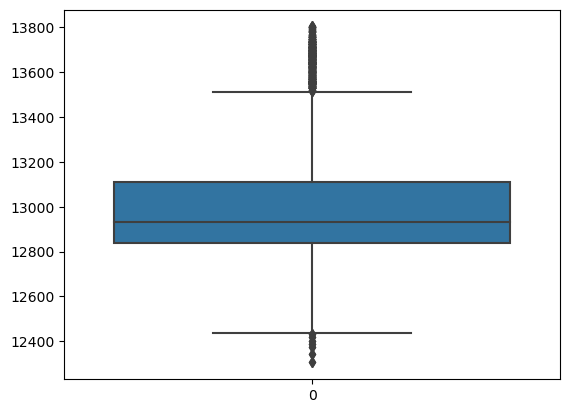

In [18]:
sns.boxplot(df2['Raw H2'])

In [19]:
df2 = df2[~(df2['Raw H2'] > 13600)]
df2.shape

(58382, 16)

In [20]:
df2.describe()

,S.NO,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
count,58382.000000,5.838200e+04,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000,58382.000000
mean,29944.204070,1.654786e+09,15.337112,49.820021,722.834007,445.987770,12965.277757,19805.634185,938.791997,9.934018,17.524441,50.273522,19.276812,7.233051,10936.170292,0.741735
std,17440.871113,1.003919e+05,13.154910,5.552642,673.960614,105.435734,165.935953,463.085959,1.017887,267.112269,541.133954,1215.097028,602.613195,269.389439,7670.679502,0.437684
min,0.000000,1.654712e+09,-22.010000,11.140000,0.000000,400.000000,12306.000000,18520.000000,930.857000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14994.250000,1.654744e+09,11.248500,47.740000,119.000000,400.000000,12838.000000,19437.000000,938.710000,1.390000,1.450000,9.560000,1.494250,0.035000,3598.000000,0.000000
50%,29728.500000,1.654762e+09,20.040000,50.380000,954.000000,400.000000,12929.000000,19500.000000,938.842000,1.810000,1.880000,12.440000,1.940000,0.044000,10398.000000,1.000000
75%,44583.750000,1.654777e+09,25.070000,53.240000,1174.000000,429.000000,13107.000000,20078.000000,939.489750,2.070000,2.150000,14.260000,2.224000,0.050000,17695.750000,1.000000
max,62454.000000,1.655130e+09,48.990000,59.990000,7999.000000,1600.000000,13600.000000,21401.000000,939.861000,12289.010000,29072.060000,60442.710000,32892.645000,17309.930000,24993.000000,1.000000


In [21]:
df2 = df2[~(df2['PM1.0'] > 280)]
df2.shape

(58277, 16)

In [22]:
df2.describe()

,S.NO,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
count,58277.000000,5.827700e+04,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000,58277.000000
mean,29907.824082,1.654785e+09,15.318584,49.836819,723.796901,444.726856,12965.006829,19805.584793,938.805766,1.651763,1.719258,11.360886,1.776538,0.043094,10955.608147,0.741270
std,17435.485137,1.003581e+05,13.159045,5.529513,674.105582,100.274913,165.785320,463.394445,0.965679,2.275902,2.393617,15.596496,2.477649,0.117357,7663.892442,0.437941
min,0.000000,1.654712e+09,-22.010000,11.140000,0.000000,400.000000,12306.000000,18520.000000,930.857000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14968.000000,1.654744e+09,11.190000,47.750000,120.000000,400.000000,12838.000000,19437.000000,938.710000,1.380000,1.440000,9.530000,1.491000,0.035000,3617.000000,0.000000
50%,29676.000000,1.654762e+09,20.025000,50.390000,956.000000,400.000000,12928.000000,19500.000000,938.843000,1.810000,1.880000,12.430000,1.939000,0.044000,10424.000000,1.000000
75%,44505.000000,1.654777e+09,25.060000,53.240000,1176.000000,429.000000,13107.000000,20078.000000,939.492000,2.070000,2.150000,14.250000,2.222000,0.050000,17709.000000,1.000000
max,62454.000000,1.655130e+09,48.990000,59.990000,7999.000000,1600.000000,13600.000000,21401.000000,939.861000,234.070000,243.890000,1609.250000,252.051000,18.309000,24993.000000,1.000000


In [23]:
df2 = df2[~(df2['PM2.5'] > 4)]
df2.shape

(58249, 16)

In [24]:
df2.head()

,S.NO,UTC,Temperature_C,Humidity,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


# Train_And_Test

In [58]:
x = df2.drop(['S.NO', 'UTC'], axis = 'columns')
y = df2['Fire_Alarm']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [59]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9978254649499285

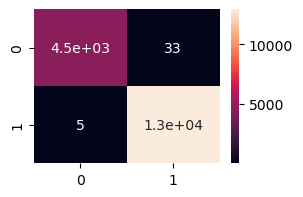

In [60]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
plt.figure(figsize=(3,2))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)
print(roc_auc, pr_auc)

0.9981724839852724 0.9989623323398286


In [62]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9982832618025751

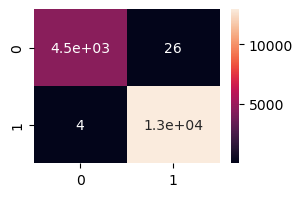

In [63]:
y_pred = svm.predict(x_test)
plt.figure(figsize=(3,2))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
plt.show()

In [64]:
roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

print(roc_auc, pr_auc)

0.9985533883895116 0.999177754616857


In [65]:
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

1.0

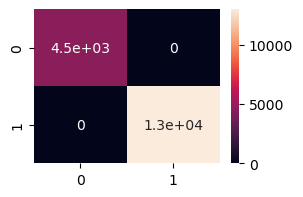

In [66]:
y_pred = rfc.predict(x_test)
plt.figure(figsize=(3,2))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
plt.show()

In [67]:
roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)
print(roc_auc, pr_auc)

1.0 1.0


In [68]:
rfr = RandomForestRegressor(n_estimators=40)
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

1.0

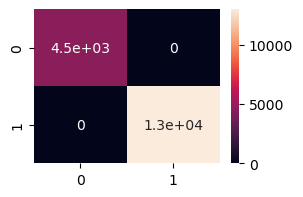

In [69]:
y_pred = rfr.predict(x_test)
plt.figure(figsize=(3,2))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
plt.show()

In [70]:
roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)
print(roc_auc, pr_auc)

1.0 1.0


In [71]:
y_pred = rfc.predict(x_test)
y_test.value_counts()

1    12986
0     4489
Name: Fire_Alarm, dtype: int64

In [72]:
from collections import Counter
Counter(y_pred)

Counter({1: 12986, 0: 4489})

In [73]:
merged_df2 = pd.merge(df2, y_test.rename('y_pred'), left_index=True, right_index=True)
print(merged_df2[['UTC', 'y_pred']])

              UTC  y_pred
3      1654733334       0
16     1654733347       0
19     1654733350       0
22     1654733353       0
30     1654733361       0
...           ...     ...
62424  1655129846       0
62425  1655129847       0
62441  1655129863       0
62450  1655129872       0
62451  1655129873       0

[17475 rows x 2 columns]
